In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy

In [3]:
Hubble_h = 0.73
BoxSize = 62.5

In [4]:
directory = '../src/auxdata/trees/modified-SF/'
#directory1 = '../src/auxdata/trees/modified-H2-CF/'
filename = 'model'
redshift = [0.000]
#snapshot = list(range(63, -1, -1))
firstfile = 0
lastfile = 7

In [5]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [6]:
def read_one_file(name):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [7]:
Galdesc = galdtype()

for i in range(len(redshift)):
    G_snap = []
    G_snap1 = []
    GalsTree = []
    for j in range(firstfile, lastfile+1):
        name = (directory+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        #name1 = (directory1+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        #snapshot 0 = redshift 127, snapshot 63 = redshift 0
        G = read_one_file(name)
        #G1 = read_one_file(name1)
        G_snap.extend(G)
        #G_snap1.extend(G1)
    G_snap = np.array(G_snap)
    #G_snap1 = np.array(G_snap1)
    G_snap = G_snap.view(recarray)
    #G_snap1 = G_snap1.view(recarray)

In [8]:
len(G_snap)

36478

In [9]:
stellarmass = G_snap.StellarMass * 1.e10 / Hubble_h
g = np.where(G_snap.ColdGas > 0.0)[0]
#w = np.where(((G_snap.BulgeMass / G_snap.StellarMass) < 0.3) & (G_snap.ColdGas > 0.0))[0]
gasmass = G_snap.ColdGas[g] * 1.e10 / Hubble_h
H2mass = G_snap.f_H2[g] * G_snap.ColdGas[g] * 1.e10 / Hubble_h
HImass = G_snap.f_HI[g] * G_snap.ColdGas[g] * 1.e10 / Hubble_h

In [10]:
max(H2mass)

7.7242209e+09

In [11]:
'''
stellarmass1 = G_snap1.StellarMass * 1.e10 / Hubble_h
#w = np.where(G_snap.ColdGas > 0.0)[0]
w = np.where(((G_snap1.BulgeMass / G_snap1.StellarMass) < 0.3) & (G_snap1.ColdGas > 0.0))[0]
gasmass1 = G_snap1.ColdGas[w] * 1.e10 / Hubble_h
H2mass1 = G_snap1.H2Gas[w] * 1.e10 / Hubble_h
HImass1 = G_snap1.HIGas[w] * 1.e10 / Hubble_h
'''

'\nstellarmass1 = G_snap1.StellarMass * 1.e10 / Hubble_h\n#w = np.where(G_snap.ColdGas > 0.0)[0]\nw = np.where(((G_snap1.BulgeMass / G_snap1.StellarMass) < 0.3) & (G_snap1.ColdGas > 0.0))[0]\ngasmass1 = G_snap1.ColdGas[w] * 1.e10 / Hubble_h\nH2mass1 = G_snap1.H2Gas[w] * 1.e10 / Hubble_h\nHImass1 = G_snap1.HIGas[w] * 1.e10 / Hubble_h\n'

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log10
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/dtriani/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


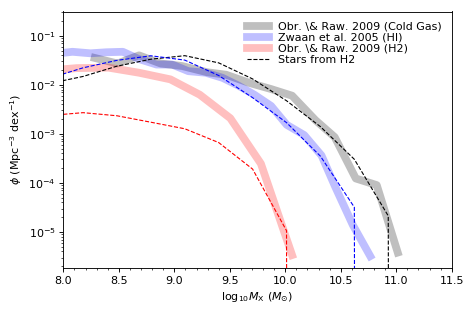

In [13]:
binwidth = 0.3

ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0) 
#ax1 = divider.append_axes("bottom", size="50%", pad=0.3)

# Baldry+ 2008 modified data used for the MCMC fitting
Zwaan = np.array([[6.933,   -0.333],
            [7.057,   -0.490],
            [7.209,   -0.698],
            [7.365,   -0.667],
            [7.528,   -0.823],
            [7.647,   -0.958],
            [7.809,   -0.917],
            [7.971,   -0.948],
            [8.112,   -0.927],
            [8.263,   -0.917],
            [8.404,   -1.062],
            [8.566,   -1.177],
            [8.707,   -1.177],
            [8.853,   -1.312],
            [9.010,   -1.344],
            [9.161,   -1.448],
            [9.302,   -1.604],
            [9.448,   -1.792],
            [9.599,   -2.021],
            [9.740,   -2.406],
            [9.897,   -2.615],
            [10.053,  -3.031],
            [10.178,  -3.677],
            [10.335,  -4.448],
            [10.492,  -5.083]        ], dtype=np.float32)
        
ObrRaw = np.array([
            [7.300,   -1.104],
            [7.576,   -1.302],
            [7.847,   -1.250],
            [8.133,   -1.240],
            [8.409,   -1.344],
            [8.691,   -1.479],
            [8.956,   -1.792],
            [9.231,   -2.271],
            [9.507,   -3.198],
            [9.788,   -5.062 ]        ], dtype=np.float32)

ObrCold = np.array([
            [8.009,   -1.042],
            [8.215,   -1.156],
            [8.409,   -0.990],
            [8.604,   -1.156],
            [8.799,   -1.208],
            [9.020,   -1.333],
            [9.194,   -1.385],
            [9.404,   -1.552],
            [9.599,   -1.677],
            [9.788,   -1.812],
            [9.999,   -2.312],
            [10.172,  -2.656],
            [10.362,  -3.500],
            [10.551,  -3.635],
            [10.740,  -5.010]        ], dtype=np.float32)

ObrCold_xval = np.log10(10**(ObrCold[:, 0])  /Hubble_h/Hubble_h)
ObrCold_yval = (10**(ObrCold[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
Zwaan_xval = np.log10(10**(Zwaan[:, 0]) /Hubble_h/Hubble_h)
Zwaan_yval = (10**(Zwaan[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
ObrRaw_xval = np.log10(10**(ObrRaw[:, 0])  /Hubble_h/Hubble_h)
ObrRaw_yval = (10**(ObrRaw[:, 1]) * Hubble_h*Hubble_h*Hubble_h)

ax0.plot(ObrCold_xval, ObrCold_yval, color='black', lw = 7, alpha=0.25, label='Obr. \& Raw. 2009 (Cold Gas)')
ax0.plot(Zwaan_xval, Zwaan_yval, color='blue', lw = 7, alpha=0.25, label='Zwaan et al. 2005 (HI)')
ax0.plot(ObrRaw_xval, ObrRaw_yval, color='red', lw = 7, alpha=0.25, label='Obr. \& Raw. 2009 (H2)')
        
mi = np.floor(min(np.log10(gasmass))) - 2
ma = np.floor(max(np.log10(gasmass))) + 2
NB = int((ma - mi) / binwidth)

(g_counts, g_binedges) = np.histogram(np.log10(gasmass), range=(mi, ma), bins=NB)
(H2_counts, H2_binedges) = np.histogram(np.log10(H2mass), range=(mi, ma), bins=NB)
(HI_counts, HI_binedges) = np.histogram(np.log10(HImass), range=(mi, ma), bins=NB)
'''
(g1_counts, g1_binedges) = np.histogram(np.log10(gasmass1), range=(mi, ma), bins=NB)
(H21_counts, H21_binedges) = np.histogram(np.log10(H2mass1), range=(mi, ma), bins=NB)
(HI1_counts, HI1_binedges) = np.histogram(np.log10(HImass1), range=(mi, ma), bins=NB)
'''
# Set the x-axis values to be the centre of the bins
g_x = g_binedges[:-1] + 0.5 * binwidth
H2_x = H2_binedges[:-1] + 0.5 * binwidth
HI_x = HI_binedges[:-1] + 0.5 * binwidth
'''
g1_x = g1_binedges[:-1] + 0.5 * binwidth
H21_x = H21_binedges[:-1] + 0.5 * binwidth
HI1_x = HI1_binedges[:-1] + 0.5 * binwidth
'''
# Overplot the model histograms
'''
ax0.plot(g1_x, g1_counts / (BoxSize/Hubble_h)**3 / binwidth, 'k', label='Cold Gas', lw=1.0)
ax0.plot(HI1_x, HI1_counts / (BoxSize/Hubble_h)**3 / binwidth, 'b', label='HI', lw=1.0)
ax0.plot(H21_x, H21_counts / (BoxSize/Hubble_h)**3 / binwidth, 'r', label='H2', lw=1.0)
'''
ax0.plot(g_x, g_counts / (BoxSize/Hubble_h)**3 / binwidth, 'k--', label='Stars from H2', lw=1.0)
ax0.plot(HI_x, HI_counts / (BoxSize/Hubble_h)**3 / binwidth, 'b--',  lw=1.0)
ax0.plot(H2_x, H2_counts / (BoxSize/Hubble_h)**3 / binwidth, 'r--', lw=1.0)


#plt.plot(mass, label='computed')
#plt.plot(Mass, label='intrinsic')
ax0.set_yscale('log', nonposy='clip')
#plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax0.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax0.set_ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
ax0.set_xlabel(r'$\log_{10} M_{\mathrm{X}}\ (M_{\odot})$')
ax0.set_xlim(8.0, 11.5)

leg = ax0.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.tight_layout()
plt.savefig('GMF-SF-unreal.png')
plt.show()

In [14]:
w = np.where(HImass > gasmass)[0]
print(w)

[]


/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log10


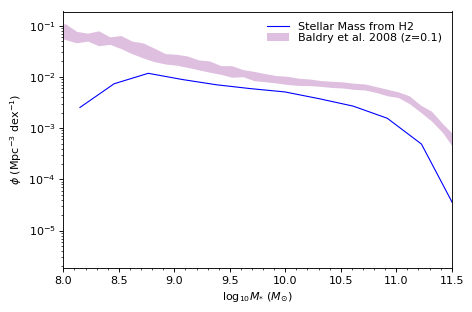

In [15]:
binwidth = 0.3

ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0) 

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
#if(whichimf == 1):  Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

# This next line is just to get the shaded region to appear correctly in the legend
#plt.plot(xaxeshisto, counts / self.volume * Hubble_h*self.Hubble_h*self.Hubble_h / binwidth, label='Baldry et al. 2008', color='purple', alpha=0.3)

mi = 8
ma = 12
NB = int((ma - mi) / binwidth)

(s_counts, s_binedges) = np.histogram(np.log10(stellarmass), range=(mi, ma), bins=NB)
s_x = s_binedges[:-1] + 0.5 * binwidth

#(s1_counts, s1_binedges) = np.histogram(np.log10(stellarmass1), range=(mi, ma), bins=NB)
#s1_x = s1_binedges[:-1] + 0.5 * binwidth

ax0.plot(s_x, s_counts / (BoxSize/Hubble_h)**3 / binwidth, color='blue', label='Stellar Mass from H2', lw=1.0)
#ax0.plot(s1_x, s1_counts / (BoxSize/Hubble_h)**3 / binwidth, color='k', label='Stellar Mass from Cold Gas', lw=1.0)
ax0.set_yscale('log', nonposy='clip')

ax0.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax0.set_ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
ax0.set_xlabel(r'$\log_{10} M_{\mathrm{*}}\ (M_{\odot})$')
ax0.set_xlim(8.0, 11.5)

leg = ax0.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

plt.tight_layout()
plt.savefig('SMF-SF-unreal.png')
plt.show()

In [16]:
w = np.where(stellarmass > 0)[0]
len(w)

11206

In [17]:
wg = np.where((G_snap.f_H2 < 0.5) & (G_snap.f_H2 > 0.495))[0]
G_snap.ColdGas[wg]

array([ 0.16449055,  0.16478691], dtype=float32)

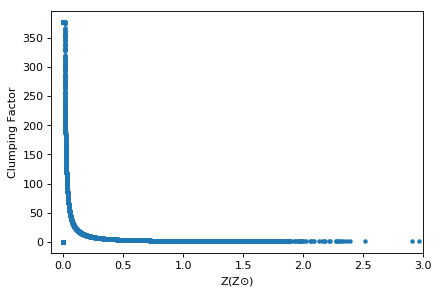

In [18]:
plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure
w = np.where(G_snap.Zp > 0)[0]      
Z = (G_snap.Zp)
cf = G_snap.cf
plt.plot(Z, cf, '.')
plt.xlim(-0.1, 3.0)
#plt.xscale('log', nonposy='clip')
plt.xlabel(r'Z(Z$\odot)$')
plt.ylabel('Clumping Factor')
plt.savefig('SF-unreal.png')
plt.show()

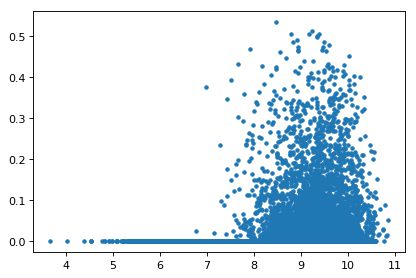

In [19]:

plt.figure()  # New figure
ax = plt.subplot(111)  # 1 plot on the figure
w = np.where(G_snap.ColdGas > 0)[0]      
cg = np.log10(G_snap.ColdGas[w] * 1.e10 /Hubble_h)
f_H2 = G_snap.f_H2[w]
plt.plot(cg, f_H2, '.')
#plt.xlim(0.0, 0.25e10)
#plt.xlabel(r'$12\ +\ \log_{10}[\mathrm{O/H}]$')
#plt.ylabel('Clumping Factor')
plt.show()


In [20]:
len(w)

35566